<a href="https://colab.research.google.com/github/prakashb-ai/programming/blob/main/PROJECT1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
##Importing the modules of the projects
import cv2rotated_image = np.rot90(image, k=1)
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.pyplot as plt
from PIL import ImageEnhance
from PIL import Image, ImageDraw

In [48]:
def read_file(filename):
  img = cv2.imread(filename)
  img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  plt.imshow(img)
  plt.show()
  return img
  

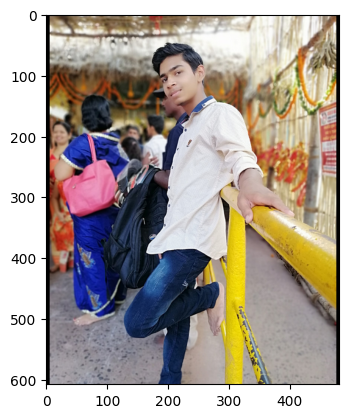

In [49]:
filename = '/content/image.png'
img = read_file(filename)
org_img = np.copy(img)


In [50]:
## CREATE EDGE MASK

def edge_mask(img,line_size,blur_value):
  gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
  gray_blur = cv2.medianBlur(gray,blur_value)

  edges = cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,
                                line_size,blur_value)
  return edges



Effects of the images


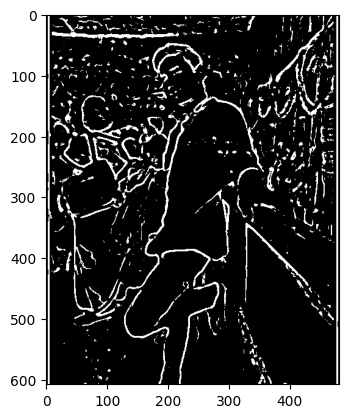

In [51]:
##effects of the images
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="binary")
plt.show()


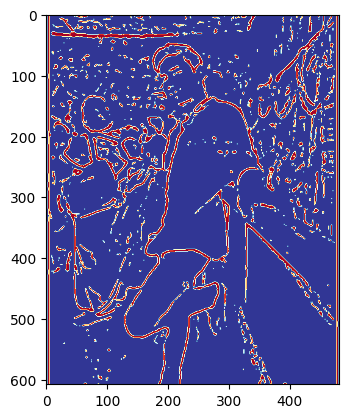

In [52]:
##effects of the images
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="RdYlBu")
plt.show()


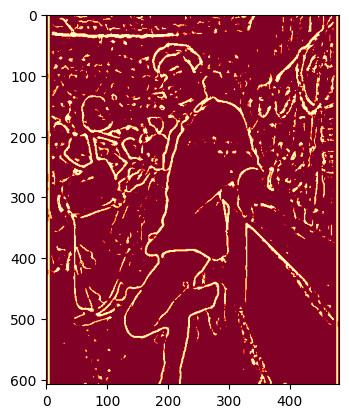

In [53]:
##effects of the images
line_size,blur_value=7,7
edges =edge_mask(img,line_size,blur_value)

plt.imshow(edges ,cmap="YlOrRd")
plt.show()


In [54]:
##REDUCE THE COLOR PLATETTE
def color_qunatization(img,k):
  data = np.float32(img).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER,20,0.001)
  ret ,label ,center = cv2.kmeans(data, k,None ,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  result = center[label.flatten()]
  result = result.reshape(img.shape)
  return result

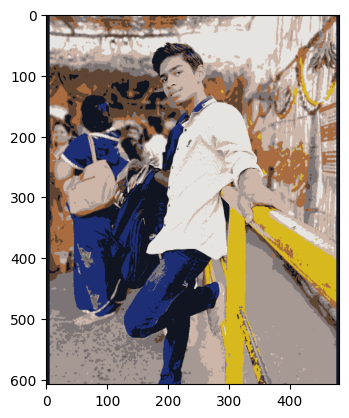

In [55]:
img = color_qunatization(img, k=9)

plt.imshow(img)
plt.show()

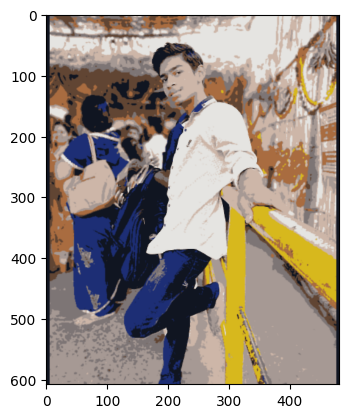

In [56]:
#REDUCE THE NOISE
blurred = cv2.bilateralFilter(img,d=3,sigmaColor=200,sigmaSpace=200)

plt.imshow(blurred)
plt.show()

Convert the original image to Cartoon effect


In [57]:
def cartoon():
  c = cv2.bitwise_and(blurred,blurred,mask = edges)
  plt.imshow(org_img)
  plt.title("orginal image")
  plt.show()

  plt.imshow(c)
  plt.title("cartoonfied_image")
  plt.show()

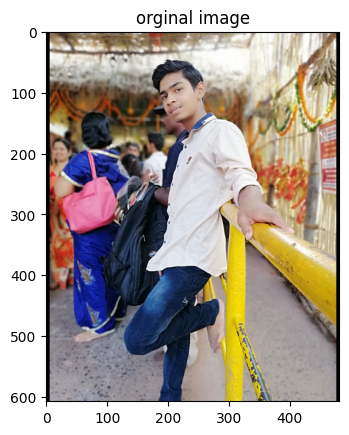

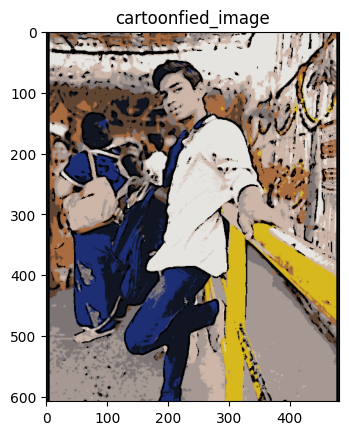

In [58]:
cartoon()

Extraction many images from single image


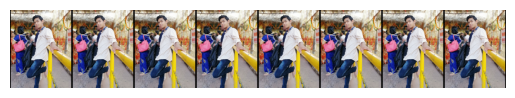

In [59]:
def display_multiple_images(image_path, num_images):
    image = Image.open(image_path)

    new_width = image.width * num_images
    new_image = Image.new('RGB', (new_width, image.height))

    for i in range(num_images):
        new_image.paste(image, (i * image.width, 0))

    plt.imshow(new_image)
    plt.axis('off')
    plt.show()

image_path = filename
num_images = 8
display_multiple_images(image_path, num_images)

Back-and-white image format


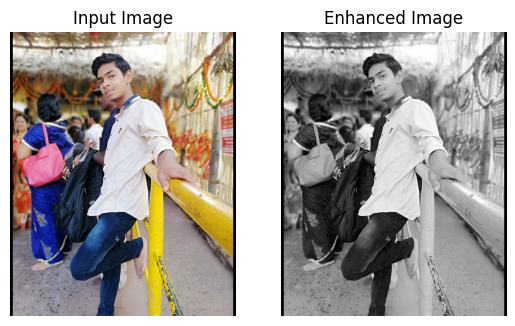

In [60]:
def increase_visuality(image):
    grayscale_image = image.convert("L")
    
    return grayscale_image
image_path = filename
input_image = Image.open(image_path)
if input_image is None:
    print("Failed to load the image. Please check the path and try again.")
else:
    enhanced_image = increase_visuality(input_image)

    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title('Input Image')
    plt.axis('off')

    # Display the enhanced image
    plt.subplot(1, 2, 2)
    plt.imshow(enhanced_image, cmap='gray')
    plt.title('Enhanced Image')
    plt.axis('off')

    # Show the plot
    plt.show()

Decrease the image brightness


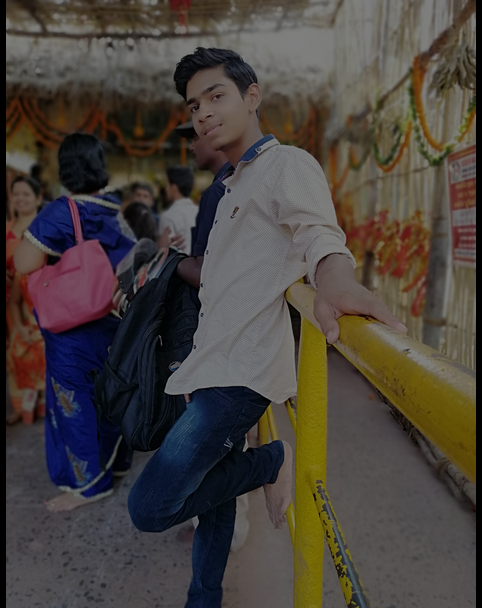

In [65]:

def increase_brightness(image_path, brightness_factor):
    image = Image.open(image_path)

    enhancer = ImageEnhance.Brightness(image)
    enhanced_image = enhancer.enhance(brightness_factor)

    return enhanced_image

image_path = filename
brightness_factor = 0.5


brightened_image = increase_brightness(image_path, brightness_factor)
brightened_image.show()

Increase the brightness of the images 


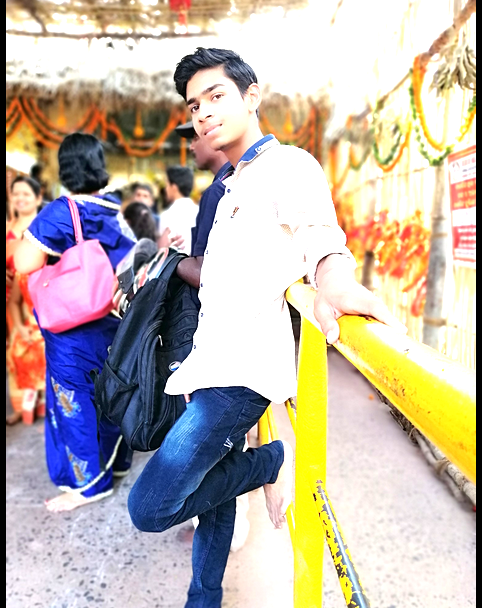

In [62]:
def increase_brightness(image_path, brightness_factor):
    image = Image.open(image_path)

    enhancer = ImageEnhance.Brightness(image)
    enhanced_image = enhancer.enhance(brightness_factor)

    return enhanced_image

image_path = filename
brightness_factor = 1.5


brightened_image = increase_brightness(image_path, brightness_factor)
brightened_image.show()

Grid the images 


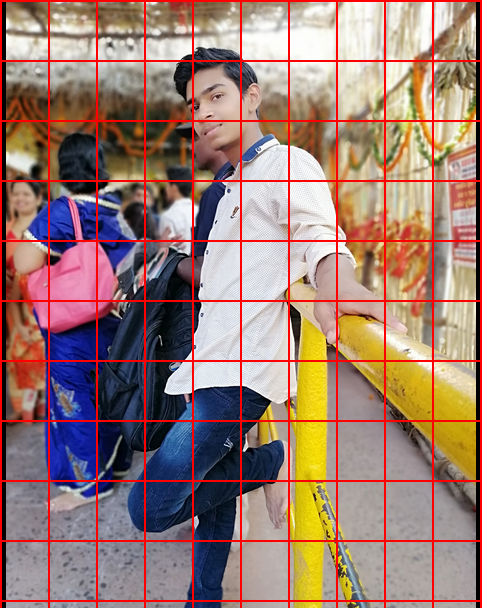

In [63]:
def draw_grid(image_path, grid_size):
    image = Image.open(image_path)

    draw = ImageDraw.Draw(image)

    width, height = image.size

    cell_width = width // grid_size
    cell_height = height // grid_size

    for x in range(0, width, cell_width):
        draw.line([(x, 0), (x, height)], fill='red', width=2)

    for y in range(0, height, cell_height):
        draw.line([(0, y), (width, y)], fill='red', width=2)

    return image

image_path = filename
grid_size = 10

image_with_grid = draw_grid(image_path, grid_size)
image_with_grid.show()

Rotating the Image using Numpy pandas and Matplot.pyplot



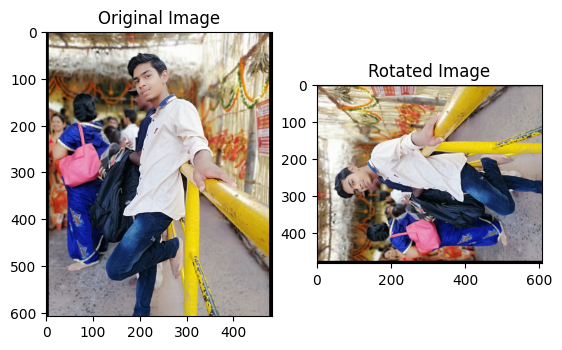

In [67]:
image = plt.imread('/content/image.png')

rotated_image = np.rot90(image, k=1)

plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(image)

plt.subplot(1, 2, 2)
plt.title('Rotated Image')
plt.imshow(rotated_image)



plt.show()
